In [130]:
# Importamos librerias a utilizar
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

ANÁLISIS GENERAL EMPRESAS DEL S&P 500

In [131]:
# Lo primero que hago es traer la información de las empresas del S&P 500
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0] 
df.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,ADM,ADM,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
8,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [133]:
# Vemos los distintos sectores a los que pertenecen las 500 empresas
df ["GICS Sector"].unique()



array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [134]:
# Empresas del S&P 500 por sector
empresas_por_sector = df.groupby('GICS Sector')['Symbol'].count() # Agrupamos las empresas por sector 

In [135]:
# Creamos una tabla que muestra las empresas por sector
empresas_por_sector = pd.DataFrame({'Sector': empresas_por_sector.index, 'Cantidad de empresas': empresas_por_sector.values})

In [136]:
empresas_por_sector

,Sector,Cantidad de empresas
0,Communication Services,24
1,Consumer Discretionary,53
2,Consumer Staples,37
3,Energy,23
4,Financials,73
5,Health Care,65
6,Industrials,73
7,Information Technology,66
8,Materials,29
9,Real Estate,30


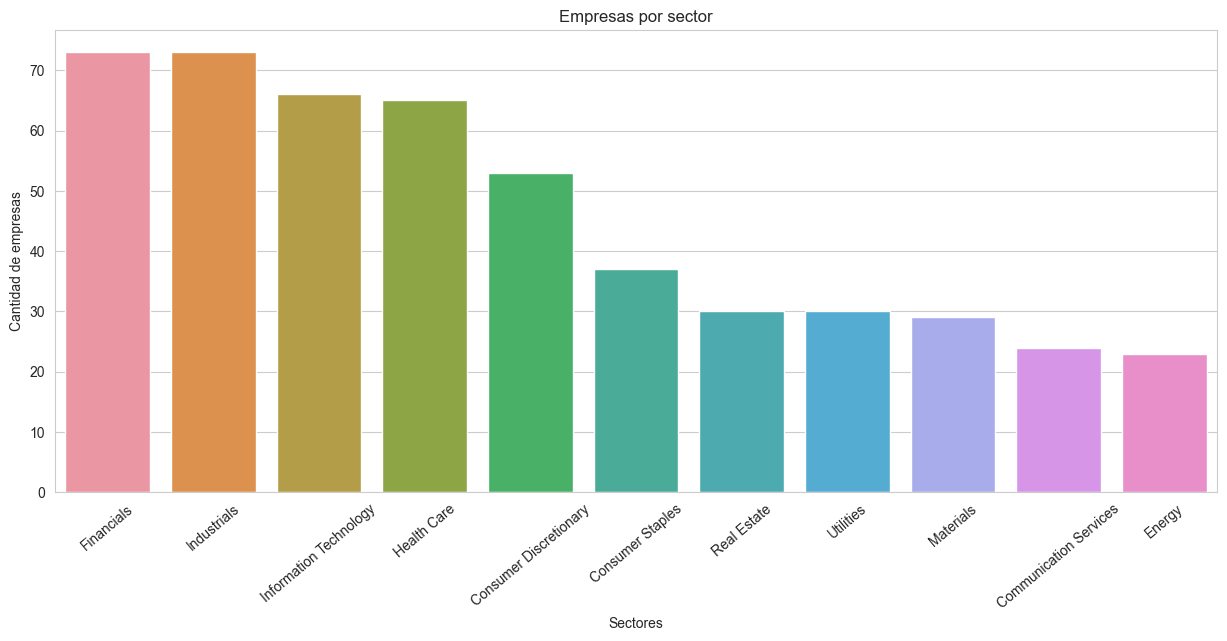

In [199]:
# Grafico empresas por sector
plt.figure(figsize=(15, 6))     
sns.barplot(x='Sector', y='Cantidad de empresas', data=empresas_por_sector, order=empresas_por_sector.sort_values('Cantidad de empresas', ascending=False).Sector) 
sns.color_palette("Paired")
plt.title('Empresas por sector')  
plt.xlabel('Sectores')             
plt.xticks(rotation = 40)            
plt.ylabel('Cantidad de empresas')      
plt.show()
     

In [88]:
# Exportamos a csv
empresas_por_sector.to_csv('C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/empresas_por_sector.csv', index=False)

In [138]:
# Buscamos la cotizacion de los ultimos 23 años del GSPC
SyP_500 = yf.download("^GSPC", start="2000-03-01", end="2023-03-23")

[*********************100%***********************]  1 of 1 completed


In [139]:
SyP_500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-01,1366.420044,1383.459961,1366.420044,1379.189941,1379.189941,1274100000
2000-03-02,1379.189941,1386.560059,1370.349976,1381.760010,1381.760010,1198600000
2000-03-03,1381.760010,1410.880005,1381.760010,1409.170044,1409.170044,1150300000
2000-03-06,1409.170044,1409.739990,1384.750000,1391.280029,1391.280029,1029000000
2000-03-07,1391.280029,1399.209961,1349.989990,1355.619995,1355.619995,1314100000


In [140]:
SyP_500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5802 entries, 2000-03-01 to 2023-03-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5802 non-null   float64
 1   High       5802 non-null   float64
 2   Low        5802 non-null   float64
 3   Close      5802 non-null   float64
 4   Adj Close  5802 non-null   float64
 5   Volume     5802 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 317.3 KB


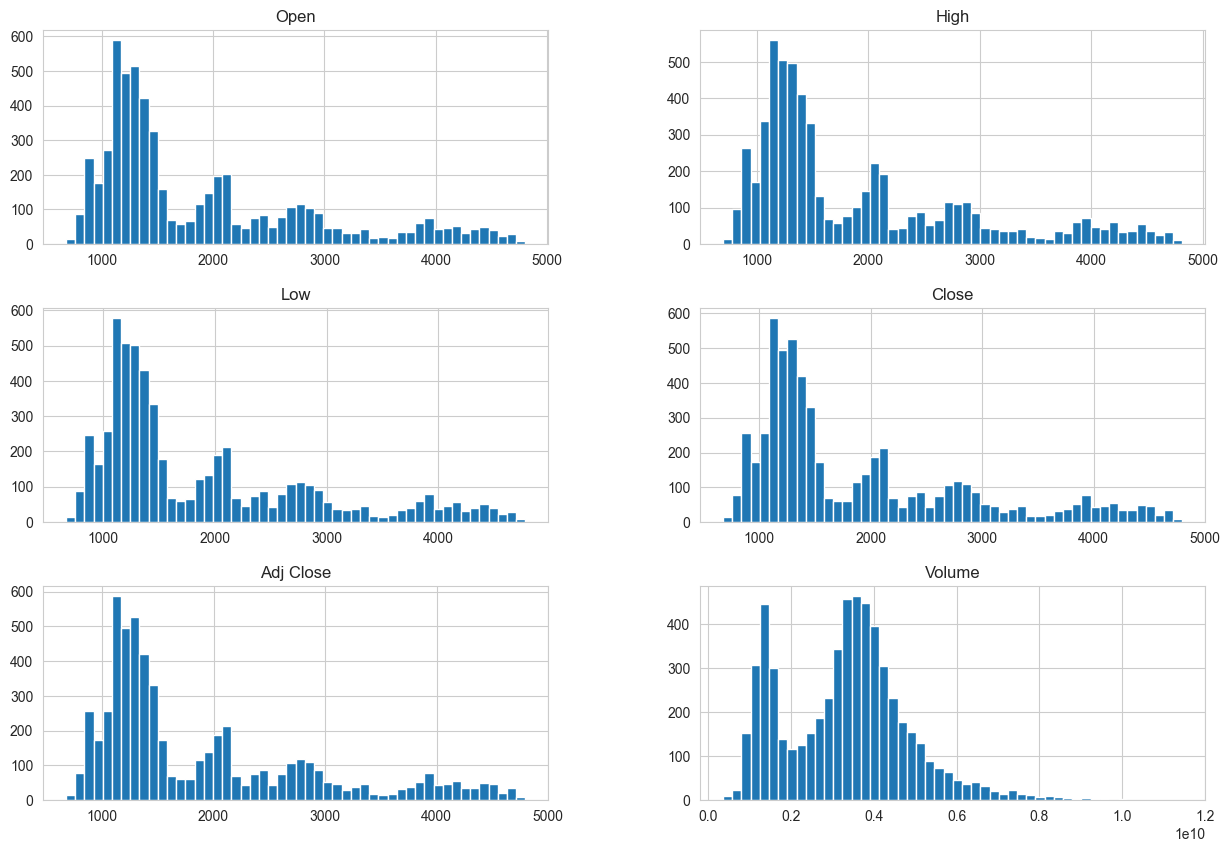

In [141]:
# Graficamos la distribución de los precios de apertura, máximo, mínimo y cierre, y el volumen de las acciones. 
SyP_500.hist(figsize=(15,10), bins=50)
plt.show()

In [142]:
#Genero una columna Date y otra Year 
SyP_500['Date'] = SyP_500.index
SyP_500.reset_index(drop = True, inplace = True)
SyP_500['Year'] = SyP_500['Date'].dt.year 


In [143]:
SyP_500.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Year
0,1366.420044,1383.459961,1366.420044,1379.189941,1379.189941,1274100000,2000-03-01,2000
1,1379.189941,1386.560059,1370.349976,1381.760010,1381.760010,1198600000,2000-03-02,2000
2,1381.760010,1410.880005,1381.760010,1409.170044,1409.170044,1150300000,2000-03-03,2000
3,1409.170044,1409.739990,1384.750000,1391.280029,1391.280029,1029000000,2000-03-06,2000
4,1391.280029,1399.209961,1349.989990,1355.619995,1355.619995,1314100000,2000-03-07,2000


In [144]:
# Agrupo los datos por año y calculo la media 
Syp_500_por_año = SyP_500.groupby(['Year']).mean()  
Syp_500_por_año['Year'] = Syp_500_por_año.index              
Syp_500_por_año.reset_index(drop = True, inplace = True) 
Syp_500_por_año.head()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16388\2967994308.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Syp_500_por_año = SyP_500.groupby(['Year']).mean()


,Open,High,Low,Close,Adj Close,Volume,Year
0,1431.221271,1443.824152,1418.043496,1430.992968,1430.992968,1.029646e+09,2000
1,1194.883793,1204.043994,1183.334397,1194.178994,1194.178994,1.232068e+09,2001
2,994.951590,1003.863256,983.893415,993.934804,993.934804,1.429026e+09,2002
3,964.306945,971.268809,957.995634,965.227540,965.227540,1.384451e+09,2003
4,1130.255516,1135.777662,1125.041824,1130.649445,1130.649445,1.423204e+09,2004


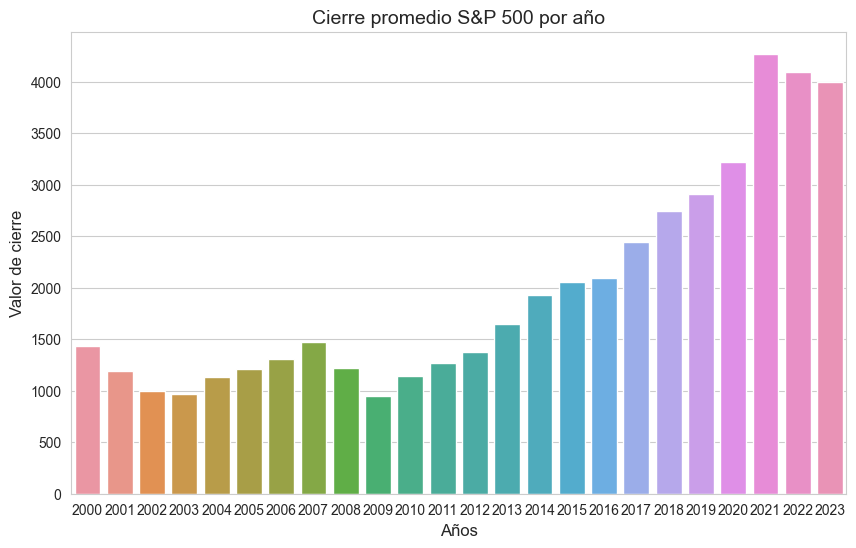

In [145]:
# Hacemos el gráfico 
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x= "Year", y= "Close", data= Syp_500_por_año)
sns.color_palette("Paired")
plt.title('Cierre promedio S&P 500 por año', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Valor de cierre', fontsize=12)
plt.show()

In [89]:
# Exportamos a csv
Syp_500_por_año.to_csv('C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/SyP_por_año.csv', index=False)

Como primera conclusión a la que podemos arribar, observando el gráfico de la evolución  del índice S&P 500 de los últimos 23 años, es que es recomendable para nuestro cliente invertir en las empresas de los distintos sectores que lo componen. Se puede ver una tendencia alsista entre los años 2000 y 2023, a  pesar de las caídas puntuales generadas por las 4 grandes crisis: Burbuja puntocom (2001), Burbuja inmobiliaria (2008), Covid 19 (2020) y Guerra Rusia - Ucrania (2022). Es por ello que en el largo plazo, la tendencia del indice nos muestra que es una buena inversión. 

ANÁLISIS POR SECTORES: ENERGY - HEALTH CARE - UTILITIES

Ya demostrado que es rentable invertir en las distintas empresas que componen el indice, mi propuesta es recomendar tres de los once sectores para hacerlo. Los sectores que elegí fueron energy, healt care y utilities. Los motivos por los cuales me incline sobre estos tres sectores, son los siguientes: 1-  Poca volatilidad frente a los aumentos de las tasas de interés (fenómeno que se viene observando marcadamente en los últimos dos años.) 2- Dividendos generados. Y 3- P/E Ratio. A continuación lo pasamos a observar.

In [148]:
# Descargo el syp 500 de cada una de los sectores que elegí.
SyP_500_energy = yf.download("^GSPE", start="2000-03-01", end="2023-03-23") #Secor energy

[*********************100%***********************]  1 of 1 completed


In [149]:
SyP_500_energy.head ()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-01,200.419998,200.419998,200.419998,200.419998,200.419998,0
2000-03-02,202.820007,202.820007,202.820007,202.820007,202.820007,0
2000-03-03,200.289993,200.289993,200.289993,200.289993,200.289993,0
2000-03-06,196.470001,196.470001,196.470001,196.470001,196.470001,0
2000-03-07,212.710007,212.710007,212.710007,212.710007,212.710007,0


In [150]:
SyP_500_healthcare = yf.download("^SP500-35", start="2000-03-01", end="2023-03-23") #sector health care

[*********************100%***********************]  1 of 1 completed


In [151]:
SyP_500_utilities= yf.download("^SP500-55", start="2000-03-01", end="2023-03-23") #sector utilities

[*********************100%***********************]  1 of 1 completed


Punto 1: TASAS DE INTERES DEL FED

Esta es una cuestión de trascendetal importancia al momento de decidir invertir sobre un determinado sector o industria del S&P 500. Ante el fenómeno de aumento de inflación en los últimos años en Estados Unidos y con el objetivo de poder controlarla, la FED tomo la desicion de aumentar las tasas de interés en los años 2022 y lo que va del 2023 (como podrá observarse en el gráfico mas abajo). Esto es una cuestión de trascendetal importancia al momento de decidir invertir sobre un determinado sector o industria, ya que el aumento en las tasas puede llevar a reducir sus ganancias y afectar negativamente su valoración en el mercado. 

In [152]:
# En la primera cuestion a tratar lo que hago es comparar los tres sectores que elegí con las tasas de interes de la FED
Tasas_FED = pd.read_csv ("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/Tasas_FED.csv") # Importo csv


In [153]:
Tasas_FED.head ()

,year,tasa interes
0,2000,6.8
1,2001,4.6
2,2002,3.1
3,2003,2.1
4,2004,1.6


In [154]:
#Genero una columna Date y otra Year (sector Energy) 
SyP_500_energy['Date'] = SyP_500_energy.index
SyP_500_energy.reset_index(drop = True, inplace = True)
SyP_500_energy['Year'] = SyP_500_energy['Date'].dt.year 


In [155]:
# Agrupo los datos por año y calculo la media (sector Energy)
Syp_500_por_año_energy = SyP_500_energy.groupby(['Year']).mean()  
Syp_500_por_año_energy['Year'] = Syp_500_por_año.index              
Syp_500_por_año_energy.reset_index(drop = True, inplace = True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16388\4134375003.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Syp_500_por_año_energy = SyP_500_energy.groupby(['Year']).mean()


In [156]:
# Extraigo las columnas que me interesan
Syp_energy = Syp_500_por_año_energy [["Close", "Year"]]

In [104]:
# Exporto csv
Syp_energy.to_csv('C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/SyP_500_energy.csv', index=False)

In [157]:
#Genero una columna Date y otra Year (sector Healthcare) 
SyP_500_healthcare['Date'] = SyP_500_healthcare.index
SyP_500_healthcare.reset_index(drop = True, inplace = True)
SyP_500_healthcare['Year'] =SyP_500_healthcare['Date'].dt.year

In [158]:
# Agrupo los datos por año y calculo la media (sector Healthcare)
Syp_500_por_año_health = SyP_500_healthcare.groupby(['Year']).mean()  
Syp_500_por_año_health['Year'] = Syp_500_por_año_health.index              
Syp_500_por_año_health.reset_index(drop = True, inplace = True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16388\3679925571.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Syp_500_por_año_health = SyP_500_healthcare.groupby(['Year']).mean()


In [159]:
#Extraigo columnas que me interesan
Syp_health = Syp_500_por_año_health [["Close", "Year"]]

In [106]:
# Exporto csv
Syp_health.to_csv('C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/SyP_500_health.csv', index=False)

In [160]:
#Genero una columna Date y otra Year (sector Utilities) 
SyP_500_utilities['Date'] = SyP_500_utilities.index
SyP_500_utilities.reset_index(drop = True, inplace = True)
SyP_500_utilities['Year'] =SyP_500_utilities['Date'].dt.year

In [161]:
# Agrupo los datos por año y calculo la media (sector Utilities)
Syp_500_por_año_utilities = SyP_500_utilities.groupby(['Year']).mean()  
Syp_500_por_año_utilities['Year'] = Syp_500_por_año_utilities.index              
Syp_500_por_año_utilities.reset_index(drop = True, inplace = True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16388\1950281715.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Syp_500_por_año_utilities = SyP_500_utilities.groupby(['Year']).mean()


In [162]:
#Extraigo columnas que me interesan
Syp_utilities = Syp_500_por_año_utilities [["Close", "Year"]]

In [108]:
#Exporto csv
Syp_utilities.to_csv('C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/SyP_500_utilities.csv', index=False)

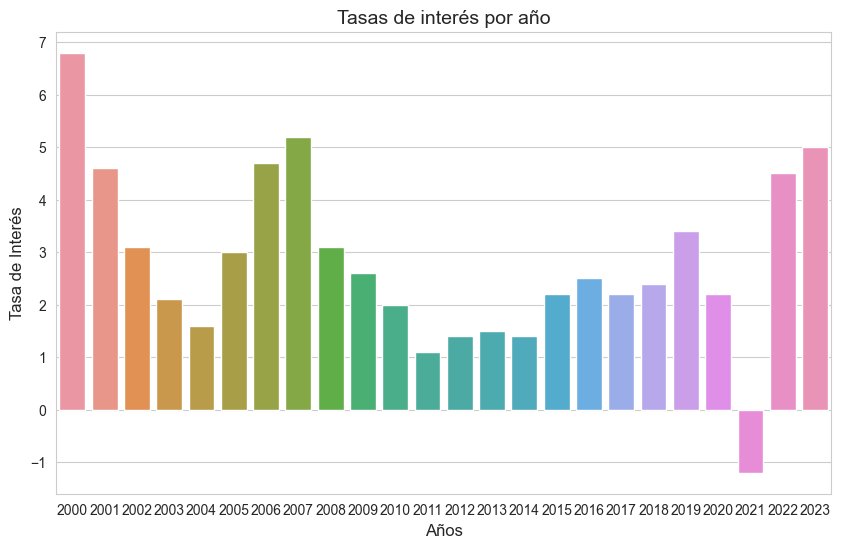

In [163]:
# Graficamos la tasa de interes del FED (para comparar el gráfico con el de los indices S&P 500 de los sectores elegidos)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x= "year", y= "tasa interes", data= Tasas_FED)
sns.color_palette("Paired")
plt.title('Tasas de interés por año', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Tasa de Interés', fontsize=12)
plt.show()

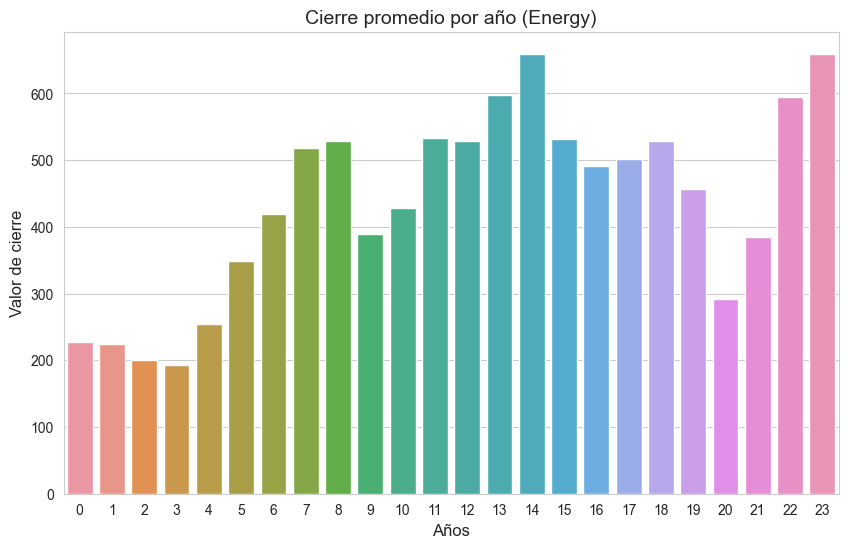

In [164]:
# Gráfico energy
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x= "Year", y= "Close", data= Syp_500_por_año_energy)
sns.color_palette("Paired")
plt.title('Cierre promedio por año (Energy)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Valor de cierre', fontsize=12)
plt.show()

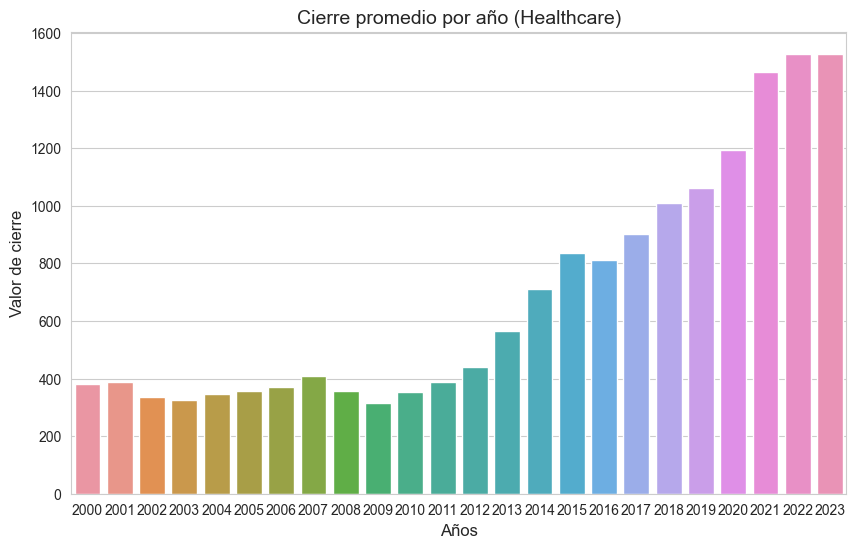

In [165]:
# Grafico healthcare
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x= "Year", y= "Close", data= Syp_500_por_año_health)
sns.color_palette("Paired")
plt.title('Cierre promedio por año (Healthcare)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Valor de cierre', fontsize=12)
plt.show()

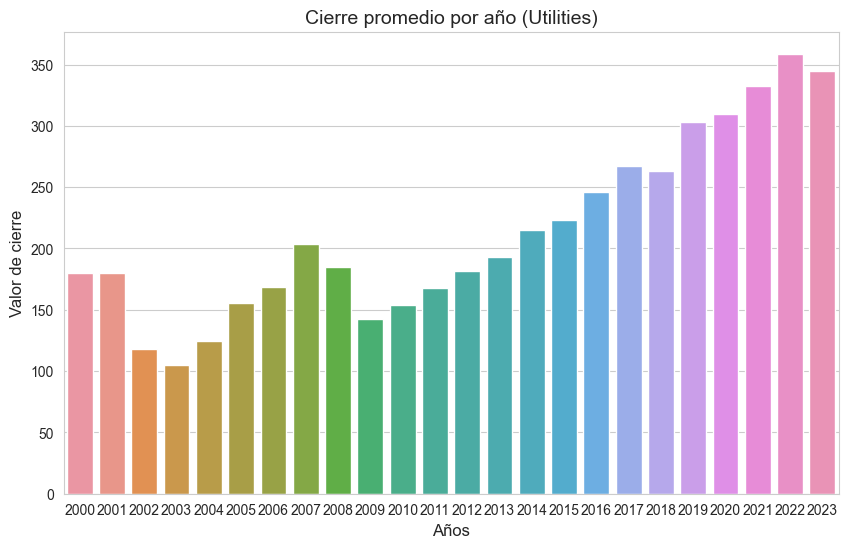

In [166]:
# Grafico Utilities
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x= "Year", y= "Close", data= Syp_500_por_año_utilities)
sns.color_palette("Paired")
plt.title('Cierre promedio por año (Utilities)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Valor de cierre', fontsize=12)
plt.show()


In [202]:
# Descargo S&P 500 Technology para comparar los resultados con los 3 sectores que elegí.
SyP_500_tech= yf.download("^SP500-45", start="2000-03-01", end="2023-03-23")

[*********************100%***********************]  1 of 1 completed


In [203]:
#Genero una columna Date y otra Year (sector Technology) 
SyP_500_tech['Date'] = SyP_500_tech.index
SyP_500_tech.reset_index(drop = True, inplace = True)
SyP_500_tech['Year'] =SyP_500_tech['Date'].dt.year

In [204]:
# Agrupo los datos por año y calculo la media (sector Technology)
Syp_500_tech_año= SyP_500_tech.groupby(['Year']).mean()  
Syp_500_tech_año['Year'] = Syp_500_tech_año.index              
Syp_500_tech_año.reset_index(drop = True, inplace = True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_16388\3245346265.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Syp_500_tech_año= SyP_500_tech.groupby(['Year']).mean()


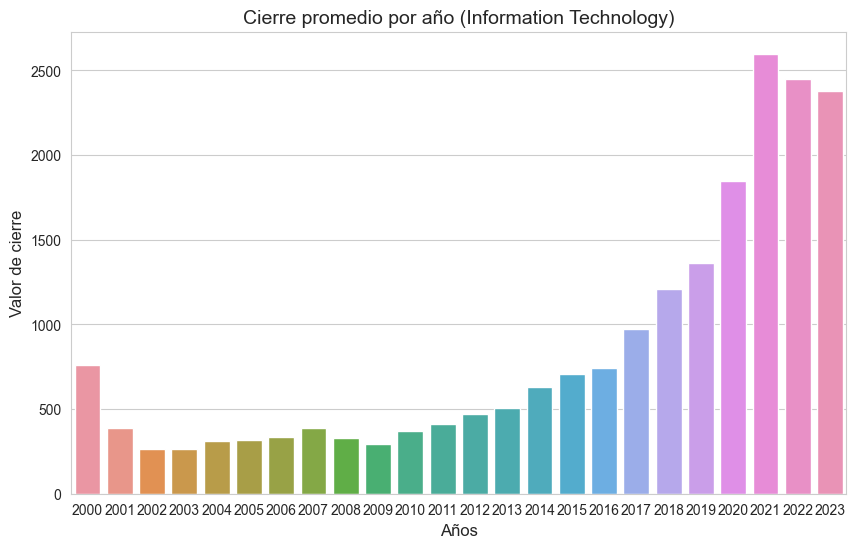

In [206]:
# Grafico Utilities
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x= "Year", y= "Close", data= Syp_500_tech_año)
sns.color_palette("Paired")
plt.title('Cierre promedio por año (Information Technology)', fontsize=14)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Valor de cierre', fontsize=12)
plt.show()

Conclusión: 
Como surge de la superposición de los distintos graficos (tasa de interés del FED y S&P 500 de los tres sectores que elegí), puede observarse que a pesar del aumento de las tasas en los años 2022 y lo que va del 2023, los tres sectores en cuestión permanecen menos vulnerables a dichos aumentos. Contrariamente a lo que pasa  en  otros sectores (ej.  technology en dónde se ve claramente que en los años 2022 y lo que va del 2023, los valores de cierre caen), los de energy, healt y utilities crecieron durante el año 2022 y 2023 independientemete de los aumentos en las tasas de interés.  

Punto 2: Dividendos
Si bien el punto principal que tuve en cuenta a la hora de seleccionar los sectores, fueron sus comportamientos frente a las tasas de interés, otra cuestion a considerar y también importante son los dividendos. Ya que los mismos representan  una parte de las ganancias que las empresas distribuyen a sus accionistas.  

In [193]:
# Aquí importo csv con los dividendos por sector en los últimos 5 años
dividendos_por_sector = pd.read_csv ("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/Dividendos.csv")

In [194]:
dividendos_por_sector.head()

,Sectores,Dividendos
0,Energy,4.2
1,Real estate,3.4
2,Utilities,3.3
3,Consumer Staples,2.7
4,Financials,2.0


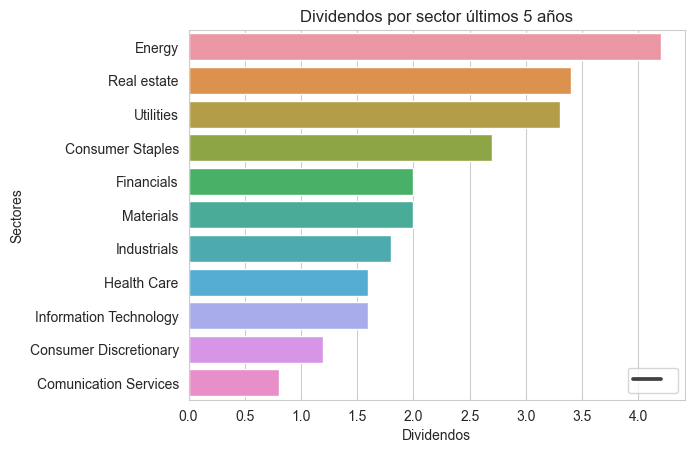

In [195]:
# Graficamos
sns.barplot(x='Dividendos', y='Sectores', data=dividendos_por_sector)
sns.color_palette("Paired")
plt.xlabel('Dividendos')
plt.ylabel('Sectores')
plt.title('Dividendos por sector últimos 5 años')
plt.legend([''])

plt.show()

Conclusión:
Como surge del gráfico, dos de los tres sectores que recomendamos se encuentran dentro de los 3 primeros lugares en  los últimos 5 años. Si bien el sector health care no se encuentra en los primeros puestos, sigue siendo una buena inversión ya que este sector tiende a ser resistente a las fluctuaciones del mercado. Esto se debe a que las necesidades  médicas y los servicios de salud son esenciales para las personas en cualquier momento, independientemente de las condiciones económicas. Al mismo tiempo es un sector en crecimiento debido al aumento de la esperanza de vida en la población. 

Punto 3: P/E Ratio
Como última cuestión tuve en cuenta el Price to earnings ratios (P/E Ratio). Es importante ya que se utiliza para determinar el plazo de tiempo que tardaría en recuperar el valor de una acción. 

In [190]:
# Aquí importo csv con el P/E Ratio por sector del 2022
PE_ratio = pd.read_csv ("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/SegundoPI/PE_Ratio.csv")

In [191]:
PE_ratio.head()

,Sector,P/E Ratio
0,Energy,7.2
1,Materials,14.9
2,Financials,17.8
3,Industrials,21.6
4,Health care,23.8


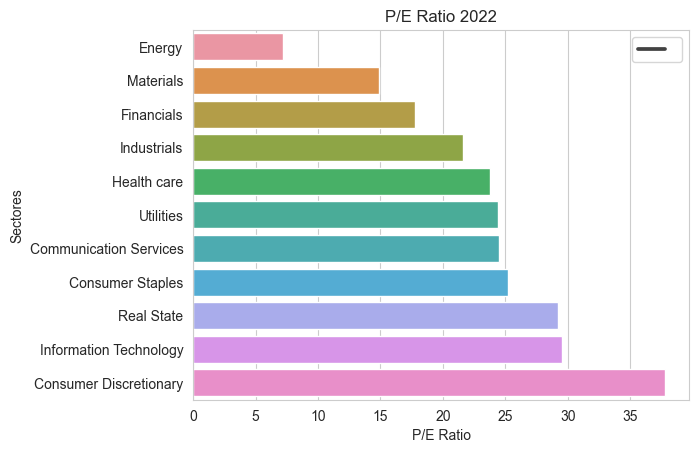

In [192]:
# Graficamos
sns.barplot(x='P/E Ratio', y='Sector', data=PE_ratio)
sns.color_palette("Paired")
plt.xlabel('P/E Ratio')
plt.ylabel('Sectores')
plt.title('P/E Ratio 2022')
plt.legend([''])

plt.show()

Conclusión:
Contar con un P/E ratio bajo es beneficioso ya que recuperaríamos la inversión en un menor tiempo. Del gráfico surge que el sector de energy cuenta con el mas bajo dentro del s&p 500 para el año 2022, recuperando el precio de la acción en tan solo 7 años. Por su parte los otros dos sectores se encuentran en valores de la media. No lo veo como algo negativo en el sector health conociendo las multiples ventajas del mismo (explicadas con anterioridad). Algo similar ocurre con el sector de utilities en donde las empresas muy comunmente proporcionan servicios esenciales, como electricidad, gas y agua, que son necesarios para las personas e industrias, independientemente de las condiciones económicas. 